# Preparation

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set()

%matplotlib inline

In [2]:
gh_raw = "https://raw.githubusercontent.com/"
user = "abjer/"
repo = "sds/"
branch = "gh-pages/"
file = "data/bechdel.csv"
url = gh_raw + user + repo + branch + file
df = pd.read_csv(url)

# Questions
#### Question 2

In [3]:
df['share_male'] = df['count_male'] / df['count']
df['share_female'] = 1 - df.share_male

       
# option 1        
df.loc[df.share_male==1,'status'] = 'all_male'
df.loc[df.share_male==0,'status'] = 'all_female'
df.loc[df.share_male.between(0,1, inclusive=False), 'status'] = 'mixed'

# option 2

# transforms 0 to 'all_female', 1 'all_male'
# fill missing values, i.e. between 0 and 1, with 'mixed'

df['status'] = df.share_male\
                    .map({0:'all_female', 1:'all_male'})\
                    .fillna('mixed') 

# convert to a categorical variable        
df.status = pd.Categorical(df.status, categories=['all_female', 'mixed', 'all_male'], ordered=True)

#### Question 3

In [25]:
df['bechdel_pass'] = df.bechdel_test==3

df_non_actor = df[df.role.isin(['writer', 'director'])]

Calculating descriptive stats

In [26]:
df_non_actor.groupby('status').bechdel_test.describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
all_female,390.0,2.869231,0.471094,0.0,3.0,3.0,3.0,3.0
mixed,206.0,2.500000,0.909302,0.0,2.0,3.0,3.0,3.0
all_male,3881.0,2.089152,1.053853,0.0,1.0,3.0,3.0,3.0


Example bar- and boxplot 

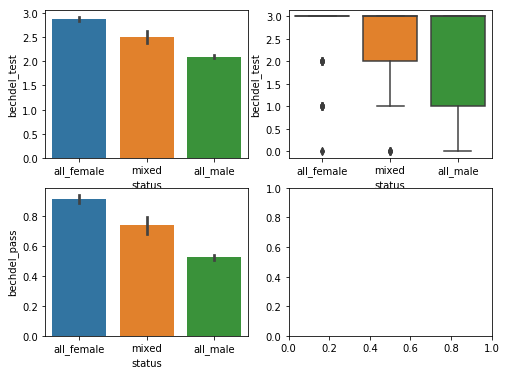

In [27]:
f,ax = plt.subplots(2,2, figsize=(8,6))
sns.barplot(x='status', y='bechdel_test', data=df_non_actor, ax=ax[0,0])
sns.boxplot(x='status', y='bechdel_test', data=df_non_actor, ax=ax[0,1])
sns.barplot(x='status', y='bechdel_pass', data=df_non_actor, ax=ax[1,0])

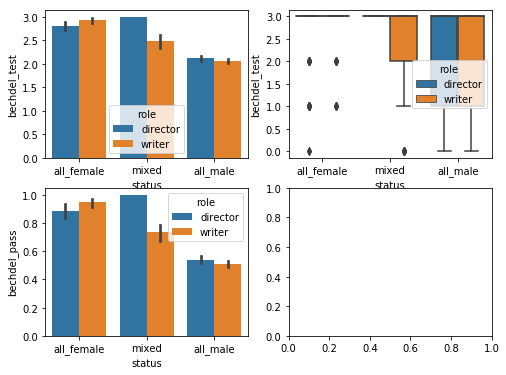

In [28]:
f,ax = plt.subplots(2,2, figsize=(8,6))
sns.barplot(x='status', y='bechdel_test', data=df_non_actor, ax=ax[0,0],hue='role')
sns.boxplot(x='status', y='bechdel_test', data=df_non_actor, ax=ax[0,1],hue='role')
sns.barplot(x='status', y='bechdel_pass', data=df_non_actor, ax=ax[1,0],hue='role')

Example lmplot

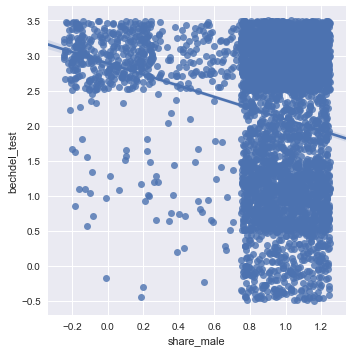

In [49]:
sns.lmplot(x='share_male', 
           y='bechdel_test', 
           data=df_non_actor, 
           x_jitter=.25, 
           y_jitter=.5)

#### Question 4

NOTE: this will be updated with student solutions

# Extra questions
Question 5

In [5]:
# selects only acting data
# split by production year
# compute mean for share_male and bechdel_test
# smoothes the time series by taking 5 period rolling mean

by_year = df[df.role=='actsin']\
            .groupby('production_year')\
            [['share_male', 'bechdel_test']].mean()\
            .rolling(5).mean()

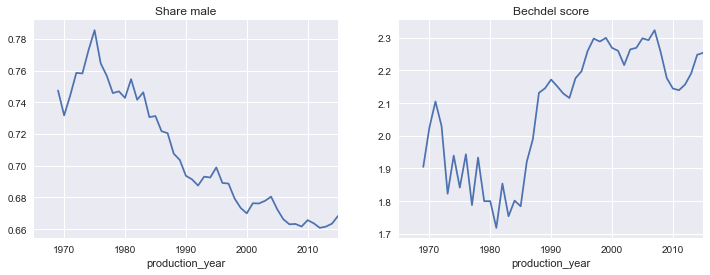

In [34]:
f,ax = plt.subplots(1,2,figsize=(12,4)) # make placeholder for two plots, setting size

# first plot: share_male
by_year.share_male.plot(ax=ax[0])
ax[0].set_title('Share male')

# second plot: bechdel_test
by_year.bechdel_test.plot(ax=ax[1])
ax[1].set_title('Bechdel score')